## Guia prático para trabalharmos com dados óticos do Pan-STARRS1

Espero que vocês já tenham instalado o HEALPix e o CFITSIO, seguindo o PDF guia.

No que se seguirá, precisaremos, basicamente de:
- Saber usar funções simples do Healpy (wrapper em python do HEALpix, que vocês também deverão ter instalado seguindo o guia anterior): como "pixelizar" um mapa, identicar em que pixel um dado par $(\theta, \phi)$ está, entre outros;
- Trabalhar com arquivos FITS;
- mascarar um mapa.

O código que extrai dados do Pan-STARRS1 armazena os objetos em arquivos FITS. Cada pixel terá um tabela com os objetos e características destes objetos e será salvo identificando tanto a resolução do pixel (NSIDE) quanto o número do pixel correspondente.

As bibliotecas em python básicas para trabalharmos serão: healpy, matplotlib e numpy. Verifique se todas estão funcionando corretamente.

OBS: para usar o jupyter(lab), sempre que quiser ativar um "box" pressione: shift+enter. Para interromper um box que está rodando, selecione o box e selecione o $interrupt\ kernel$ (seu simbolo é um quadrado no jupyter lab), ou interrompa todo código com o $restart\ kernel$ (seu simbolo é uma seta curva no jupyter lab).

In [4]:
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
#O último informa que estamos em um "notebook" ao matplotlib

from math import * #importa todas as funções da bibliteca math

Vocês podem baixar um notebook com exemplos de como usar o healpy em https://github.com/healpy/healpy/blob/master/doc/healpy_tutorial.ipynb.
O que farei aqui será algo prático.

A primeira informação que precisamos dar para trabalharmos com o healpy é qual a resolução dos pixels, ou seja, basicamente qual o tamanho dos pixels. Isto será feito segundo uma quantidade chamada de NSIDE. O Número de pixels (NPIX) numa dada resolução será NPIX = 12$*$NSIDE². Os NSIDEs terão de ser potências de 2, ou seja, $2^n$ para um $n \in \{0,1,2,..\}$. Então o menor NSIDE é 1. 

Vejamos como seria uma "pixelização" para NSIDE=1. Aqui, como exemplo, vou assumir que os pixels tem valores crescente associados a eles. Vide que um pixel tem que conter alguma informação, um número para que ele gere um mapa. Faremos então um mapa como NPIX = 12*NSIDE²=12, com o primeiro pixel com o valor 0, o segundo 1, ... Preste atenção também no fato das numerações de vetores (arrays, list, dic,...) em python começa em índice 0. Logo, um vetor de tamanho 12, chamemos este vetor, p.ex., de $\textbf{vec}$, será tal que $\textbf{vec}[i]$, com $i = 0,1,..,11$, ou seja, na nossa construção aqui será:

$\textbf{vec}[0]=0$, $\textbf{vec}[1]=1$, ..., $\textbf{vec}[11]=11$

Para criar uma função crescente, com taxa de crescemento 1, eu uso a função $\textbf{arange}$ do numpy, que deve ser chamada com o prefixo $np$, para informar que é uma função da biblioteca do numpy.

In [5]:
NSIDE = 1
NPIX = hp.nside2npix(NSIDE) #esta função do healpy (hp) tem como input o nside e output o npix (numero de pixels)
NPIX

12

In [6]:
vec = np.arange(NPIX)

In [7]:
for i in range(NPIX):
    print("vec[{}] = {}".format(i,vec[i]))

vec[0] = 0
vec[1] = 1
vec[2] = 2
vec[3] = 3
vec[4] = 4
vec[5] = 5
vec[6] = 6
vec[7] = 7
vec[8] = 8
vec[9] = 9
vec[10] = 10
vec[11] = 11


Como este vetor $\textbf{vec}$ tem o mesmo tamanho (dimensão) do NPIX podemos usá-lo para gerar um mapa. Geraremos um mapa no formato $mollview$.

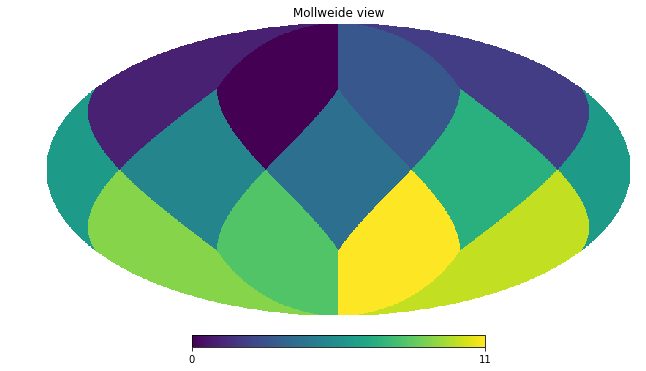

In [8]:
hp.mollview(vec)

Agora identifiquemos a posição de um certo pixel no mapa. Para isso tomarei todos os pixels inicialmente com um mesmo valor (digamos, False) e somente o pixel que eu quiser saber a localização no mapa darei outro valor (digamos, False)

In [9]:
vec = 0*vec #multipliquei todos os valores por 0, assim teremos somente 0.
vec = vec.astype(bool) #transformei em um booleano. 0=False e 1=True.
print(vec)


pixel = 0
vec[pixel]=True
print(vec)

[False False False False False False False False False False False False]
[ True False False False False False False False False False False False]


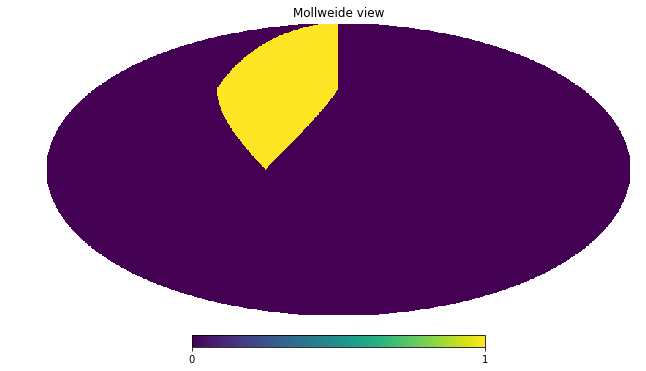

In [10]:
hp.mollview(vec)

Vale a pena vocês testarem diferentes valores de NSIDE e verificarem tanto o tamanho dos pixels quanto suas localizações.


Cada posição nos mapas tem ângulos $(\theta, \phi)$, ou $(x,y,z)$, e podemos identificar em que pixel está um dado ângulo. Os ângulos que usaremos são chamados de $declination$ (dec) e $right\ ascension$ (ra) (ver https://en.wikipedia.org/wiki/Right_ascension e https://www.skyandtelescope.com/astronomy-resources/right-ascension-declination-celestial-coordinates/) que são coordenadas celestes. $\theta = $ dec e corresponde a latitude, e $\phi = $ ra e corresponde a longitude.  

$\theta \in (90⁰,-90⁰)$

$\phi \in (0⁰, 360⁰)$

Como veremos no que se seguirá, é sempre bom ter em mente quais unidade de ângulo que estão sendo usadas (radianos ou graus) e quais tipos de coordenadas, a depender podem ser usadas: (latitude, longitude), (colatitude, longitude),... De modo geral, as funções do Healpy estão em (dec,ra), mas há a classe de funções $Pixel \ querying \ routines$ que trabalha com colatitudes. É sempre útil verificar a documentação do healpy (https://healpy.readthedocs.io/en/latest/tutorial.html)

In [11]:
theta = np.pi/3.  #em radianos
phi   = np.pi/10. #em radianos
pix   = hp.ang2pix(NSIDE, theta=theta, phi=phi) 
pix2  = hp.ang2pix(NSIDE, theta=np.degrees(theta), phi=np.degrees(phi), lonlat=True) 
print(pix)
print(pix2)

0
0


Observe que para trabalhar em unidades de graus eu tive que escrever que "lonlat" é "True". 

O resulta acima me diz que $(\theta,\phi) = (\frac{\pi}{3},\frac{\pi}{10})$ está dentro do primeiro pixel (pixel = 0). Verifique se isso faz sentido.

Será importante que vocês também saibam manipular arquivos dentro do seu computador a partir do python, assim como mexer no próprio terminal a partir do python. Mas vamos aos poucos, muitas coisas relacionadas a isto já estão prontas. Para mexer com este tipo de coisa precisamos das bibliotecas "os" e "sys".

In [12]:
import sys, os

Junto a este código "notebook" estarei deixando uma pasta chamada de "cl_30bins", que contém dados de espectro de potência angular de 21 cm (espectro de potência é a transformada de Fourier da função de correlação, ou função "dois pontos", que aqui será de campos de temperatura da radiação de 21cm). Baixem esta pasta também. 

Digamos que vocês colocaram tanto o código "guia_pratico.ipynb" quanto a pasta "cl_30bins" numa pasta chamada "IC", no meu caso esta pasta está no caminho (path) /home/marins/Documentos/Programmation/IC, então a pasta cl estará na path /home/marins/Documentos/Programmation/IC/cl_30bins. Ela contêm os Cls para 30 faixas de redshift diferentes. As faixas podem ser encontradas no arquivo "z.dat", sendo as faixas a diferença entre os redshifts de duas linhas.

In [13]:
path_cls = "/home/marins/Documentos/Programmation/IC/cl_30bins"
os.path.isdir(path_cls) #verifica se existe a pasta "cl_30bins" nesta path.

True

In [14]:
nbin = 1 #qual bin de redshift usar. 1<= nbin <= 30
bin_file = "".join(["bin",str(nbin),".dat"])
path_bin = os.path.join(path_cls,bin_file) #junto o caminho da pasta com o nome do arquivo para gerar o caminho do arquivo
os.path.isfile(path_bin) #verificará se na path dada existe um arquivo

True

In [15]:
l,cl = np.loadtxt(path_bin, unpack=True) #carrego o arquivo, que tem duas colunas. A primeira coluna são os multipolos l e a  segunda os Cl associados.

Com os $\mathcal{C}_{\ell}$, podemos gerar mapas. Aqui, os mapas serão de temperatura de 21cm, mais especificamente, das perturbação em torno da temperatura média, $\delta T_{21}$, projetadas numa casca esférica. Para obtê-los, usamos a função $\textbf{synfast}$, da classe $\textbf{sphtfunc}$. Com ela, damos a "resolução", NSIDE, e o conjunto de $\mathcal{C}_{\ell}$ para obtermos os mapas em tal resolução.

/home/marins/.local/lib/python2.7/site-packages/healpy/sphtfunc.py:400: FutureChangeWarning: The order of the input cl's will change in a future release.
Use new=True keyword to start using the new order.
See documentation of healpy.synalm.
  category=FutureChangeWarning,


Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


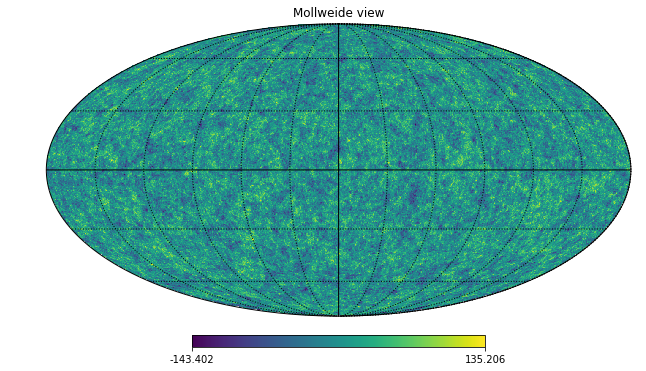

In [16]:
NSIDE = 2**10
map1 = hp.sphtfunc.synfast(cl,NSIDE)
hp.mollview(map1)
hp.graticule()

OBS: Para quem já leu sobre espectros de potência, aqui os $\mathcal{C}_{\ell}$ foram construídos a partir de um espectro de potência da matéria, $P_m(k)$ sem a amplitude, ou seja, somente com a informação da função de transferência e da dependência do índice espectral: $k^{n_s}T^2_m(k)$.

## ARQUIVOS FITS

Vamos agora tentar escrever e ler alguns arquivos FITS.

Comecemos escrevendo o mapa anterior em um arquivo FITS. Para uma melhor explicação vocês também podem acessar https://healpy.readthedocs.io/en/latest/generated/healpy.fitsfunc.write_map.html#healpy.fitsfunc.write_map.

Mas podemos acessar a documentação da função usando o simbolo "?" após chamar a função, como feito abaixo

In [17]:
hp.write_map?

Signature: hp.write_map(filename, m, nest=False, dtype=<type 'numpy.float32'>, fits_IDL=True, coord=None, partial=False, column_names=None, column_units=None, extra_header=(), overwrite=False)
Docstring:
Writes a healpix map into a healpix file.

Parameters
----------
filename : str
  the fits file name
m : array or sequence of 3 arrays
  the map to write. Possibly a sequence of 3 maps of same size.
  They will be considered as I, Q, U maps.
  Supports masked maps, see the `ma` function.
nest : bool, optional
  If True, ordering scheme is assumed to be NESTED, otherwise, RING. Default: RING.
  The map ordering is not modified by this function, the input map array
  should already be in the desired ordering (run `ud_grade` beforehand).
fits_IDL : bool, optional
  If True, reshapes columns in rows of 1024, otherwise all the data will
  go in one column. Default: True
coord : str
  The coordinate system, typically 'E' for Ecliptic, 'G' for Galactic or 'C' for
  Celestial (equatorial)
part

In [18]:
file_name = "cl21_bin1.fits" #Nome que escolhi
path      = "/home/marins/Documentos/Programmation/IC/" 
path_map = os.path.join(path,file_name) #caminho onde deixarei o arquivo

#--------------------
#Caso voce tente rodar duas vezes este box e já existir o arquivo ele dará erro. 
#Este comando abaixo serve para, caso exista, excluí-lo
if os.path.isfile(path_map): os.remove(path_map)
#--------------------



if os.path.isdir(path):
    hp.write_map(path_map,map1)  #escreve o arquivo
    if os.path.isfile(path_map): #verifica se o arquivo foi criado. Só fiz este trecho por completeza. 
                                 #Ele não é necessário, mas carrega parte da ideia dos códigos que usamos, que têmq ue verificar 
                                 #a existencia de arquivos e pastas, e tratar erros.
        print("Foi criado")
    else:
        print("Não foi criado")
           
else: 
    print("nao existe o diretorio {}".format(path))
       

Foi criado


Tentemos lê-lo, ou seja, abrir o arquivo que geramos. https://healpy.readthedocs.io/en/latest/generated/healpy.fitsfunc.read_map.html

NSIDE = 1024
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


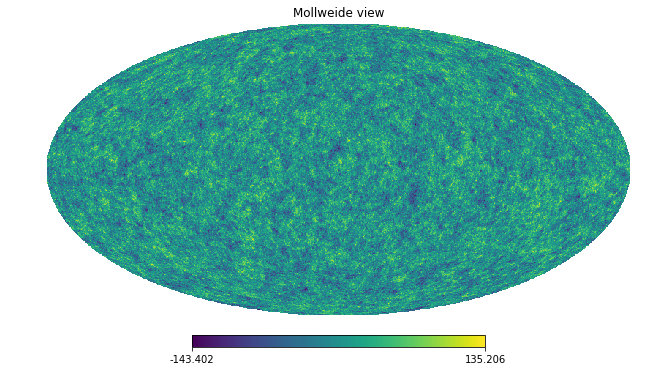

In [19]:
map2 = hp.read_map(path_map)
hp.mollview(map2)

Veja que ele estará exatamente na resolução (NSIDE) que criamos.


Podemos por exemplo abrir outro arquivo e ler, um mapa de dados simulados feito pelo código FLASK (http://www.astro.iag.usp.br/~flask/ ).


Na mesma pasta há um arquivo chamado "delta-f1z1.fits", 
- "f1" é "field=1" e aqui significa que estamos lidando com (campos de intensidade de) 21cm (ou seja, os $\delta T_{21}$, e por isso o nome "delta" no início do nome do arquivo);
- "z1" significa que é no bin 1, que aqui é $\Delta z = (0.1273, 0.1363)$, ou seja, está na faixa de redshift que começa em $z = 0.1273$ e vai até $z = 0.1363$.


Ou seja, este arquivo contêm um $\textbf{mapa}$. 

Lembremos que a relação entre o redshift do sinal que está sendo emitido (radiação de 21cm) e a frequência observada é:

$1 + z = \frac{\nu _{emitido}}{\nu _{observado}} = \frac{\nu _{21cm}}{\nu _{observado}}$, com $\nu$ sendo frequência.

$\nu_{21cm} = 1420.4058 Hz $

In [20]:
map_name       = "delta-f1z1.fits"
path_directory = "/home/marins/Documentos/Programmation/IC"
path_map       = os.path.join(path_directory,map_name)
os.path.isfile(path_map)

True

In [21]:
map3 = hp.read_map(path_map)

NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


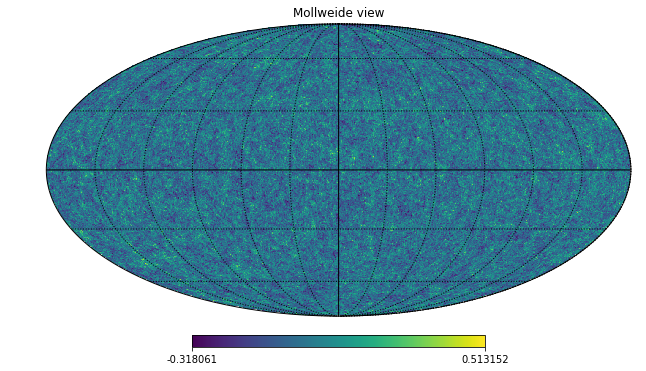

In [22]:
hp.mollview(map3)
hp.graticule()

Este mapa difere do anterior em duas frentes: 
    - São dados simulados;
    - Pela amplitude.
Por isso as intensidades diferem.

## Manipulando tabelas em FITS

Precisamos de funções da biblioteca $\textbf{astropy}$ que tratem arquivos FITS (para mais informações, http://docs.astropy.org/en/stable/io/fits/), então importemo-nas. Agora não leremos um mapa, mas um banco de dados.

In [23]:
from astropy.io import ascii, fits
from astropy.table import Table, join, hstack, vstack

In [27]:
file_fits = "pixel.fits"
path_fits = os.path.join(os.getcwd(),"pixel.fits")
os.path.isfile(path_fits)

True

Para ler a tabela de dados, usaremos a classe $\textbf{Table}$ com a função $\textbf{read}$.

In [31]:
tab = Table.read(path_fits)
tab

objID,uniquePspsSTid,ippObjID,surveyID,tessID,projectionID,skyCellID,randomStackObjID,primaryDetection,bestDetection,dvoRegionID,processingVersion,gippDetectID,gstackDetectID,gstackImageId,gra,gdec,graErr,gdecErr,gEpoch,gPSFMag,gPSFMagErr,gApMag,gApMagErr,gKronMag,gKronMagErr,ginfoFlag,ginfoFlag2,ginfoFlag3,gnFrames,rippDetectID,rstackDetectID,rstackImageId,rra,rdec,rraErr,rdecErr,rEpoch,rPSFMag,rPSFMagErr,rApMag,rApMagErr,rKronMag,rKronMagErr,rinfoFlag,rinfoFlag2,rinfoFlag3,rnFrames,iippDetectID,istackDetectID,istackImageId,ira,idec,iraErr,idecErr,iEpoch,iPSFMag,iPSFMagErr,iApMag,iApMagErr,iKronMag,iKronMagErr,iinfoFlag,iinfoFlag2,iinfoFlag3,inFrames,zippDetectID,zstackDetectID,zstackImageId,zra,zdec,zraErr,zdecErr,zEpoch,zPSFMag,zPSFMagErr,zApMag,zApMagErr,zKronMag,zKronMagErr,zinfoFlag,zinfoFlag2,zinfoFlag3,znFrames,yippDetectID,ystackDetectID,ystackImageId,yra,ydec,yraErr,ydecErr,yEpoch,yPSFMag,yPSFMagErr,yApMag,yApMagErr,yKronMag,yKronMagErr,yinfoFlag,yinfoFlag2,yinfoFlag3,ynFrames
int64,int64,int64,int64,int64,int64,int64,float64,int64,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64
119880098498936345,3639748000001310,84112639559700,0,2,1503,40,0.351486485778807,1,1,19584,3,4991,2523081323589931903,3969417,9.84993043,9.90489786,0.140541,0.129723,56008.5018352,23.2524,0.252251,-999.0,0.035961,-999.0,-999.0,186646529,655364,196608,6,4991,2523079386291245951,3962200,9.84992333,9.90489592,0.0263982,0.0240988,55878.1998113,21.881,0.054398,21.7019,0.008163,21.9221,0.079267,195035141,655360,196608,8,4991,2523087356945240959,3991893,9.84993849,9.90489304,0.0257263,0.0221058,56281.421716,21.5755,0.059825,21.2472,0.006183,21.3222,0.075286,262160391,524288,196608,8,4991,2523082343376229247,3973216,9.84991056,9.90491899,0.0565731,0.0545078,55996.6557542,21.5367,0.113765,21.8796,0.010239,21.6824,0.167343,195035141,655360,196608,12,4991,2523106208898880383,4062122,9.84991566,9.90494521,0.0523124,0.0497755,56242.5968096,21.0445,0.137419,20.8053,0.005459,21.0508,0.203365,195035141,655360,196608,11
119890098629589982,3639748000001418,84112639561355,0,2,1503,40,0.431677318580148,1,1,19584,3,4800,2523081323589931712,3969417,9.86297828,9.91624063,0.0221516,0.0204465,56008.5018352,21.2567,0.039759,21.3754,0.006991,21.4696,0.057319,195035205,655488,196608,6,4800,2523079386291245760,3962200,9.86297192,9.91624882,0.00710789,0.00686391,55878.1998113,20.0719,0.012733,20.199,0.004086,20.2735,0.019054,262144069,524416,196608,7,4800,2523087356945240768,3991893,9.86297506,9.91624618,0.00234366,0.00236131,56281.421716,18.707,0.004645,18.6837,0.001899,18.7603,0.007321,262144069,524416,196608,13,4800,2523082343376229056,3973216,9.86297901,9.91624801,0.00347224,0.00352631,55996.6557542,18.074,0.006085,18.0326,0.001741,18.1202,0.009001,262144069,524416,196608,12,4800,2523106208898880192,4062122,9.86297362,9.91624602,0.00362741,0.00353261,56242.5968096,17.6793,0.007165,17.6478,0.001275,17.7861,0.01213,262144069,524416,196608,13
119900098302446673,3639748000001172,84112639557234,0,2,1503,40,0.35968059241742,1,1,19584,3,5260,2523081323589932172,3969417,9.8302282,9.92179745,0.0808276,0.0746059,56008.5018352,22.6904,0.145074,22.7309,0.01305,22.9234,0.230673,195035141,655360,196608,8,5260,2523079386291246220,3962200,9.83025715,9.92183726,0.0185852,0.0169664,55878.1998113,21.396,0.038298,21.606,0.007811,21.7002,0.062286,195035205,655488,196608,8,5260,252

Cada linha desta tabela é um objeto e cada coluna uma informação. Podemos saber quais colunas de dados temos e quais variáveis ela está associada, como é feito abaixo. As primeiras letras $g$, $r$, $i$, $y$ e $z$ se referem as bandas.

In [37]:
tab.info()

<Table length=79>
       name        dtype 
----------------- -------
            objID   int64
   uniquePspsSTid   int64
         ippObjID   int64
         surveyID   int64
           tessID   int64
     projectionID   int64
        skyCellID   int64
 randomStackObjID float64
 primaryDetection   int64
    bestDetection   int64
      dvoRegionID   int64
processingVersion   int64
     gippDetectID   int64
   gstackDetectID   int64
    gstackImageId   int64
              gra float64
             gdec float64
           graErr float64
          gdecErr float64
           gEpoch float64
          gPSFMag float64
       gPSFMagErr float64
           gApMag float64
        gApMagErr float64
         gKronMag float64
      gKronMagErr float64
        ginfoFlag   int64
       ginfoFlag2   int64
       ginfoFlag3   int64
         gnFrames   int64
     rippDetectID   int64
   rstackDetectID   int64
    rstackImageId   int64
              rra float64
             rdec float64
           rraErr fl

Se eu quiser acessar somente os dados de magnitude PSF da banda r, p.ex., $\textbf{rPSFMag}$, faço

In [35]:
tab['rPSFMag']

21.881
20.0719
21.396
20.8286
19.8072
22.9726
22.5991
21.8232
20.2891
22.9168
23.1386


Com cada linha representando um objeto celeste.

## Começando a trabalhar...

Façamos inicialmente dois exercícios:

1⁰) Plotar a distribuição de galáxias nos pixels, ou seja, fazer um gráfico no matplotlib de $(\theta,\phi)$;

2⁰) Plotar o gráfico da fig. 19 do artigo https://arxiv.org/abs/1612.05560.

Eu fornecerei 9 arquivos fits que representam um conjunto de galáxias extraídas do PS1 em certos pixeis. Vocês deverão abrir os arquivos e tratar os dados.

No segundo exercício façam primeiro o gráfico para um pixel, e depois façam para todos pixeis juntos.